In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(12,8)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

# Sneak peek at the dataset

In [2]:
df = pd.read_csv('googleplaystore.csv')
reviews_df=pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
df.drop_duplicates(subset=['App'],inplace=True)

In [4]:
df=df[df['Android Ver'] != np.nan]
df=df[df['Installs'] != 'Free']

## Data cleaning

In [35]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: float(x))

df['Size']=df['Size'].apply(lambda x: x.replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: x.replace('M','') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: float(x.replace('k',''))/1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

df['Price']=df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
df['Price']=df['Price'].apply(lambda x: float(x))

df['Reviews']=df['Reviews'].apply(lambda x: float(x))
df['Category']=df['Category'].apply(lambda x: x.replace('_',' ') if '_' in str(x) else x)

## What type of apps are in demand?

In [65]:
category=df['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = category.index,
        y = category.values,hoverinfo='y',marker_color='#0000ff')]
layout=go.Layout(
    title = 'Category-wise App Demand',
    yaxis = {'title': 'Number of Apps'},
    xaxis = {'title': 'Categories','tickangle': -60})
fig0=go.Figure(data=data,layout=layout)
fig0.show()

* **Family** and **Game** apps have the highest market demand, but **Tools**, **Business** and **Medical** related apps are'nt far behind.

## Average rating of apps

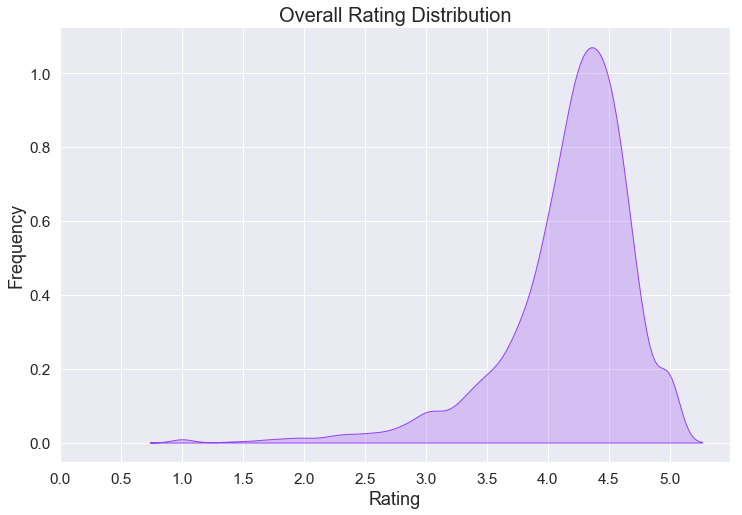

In [37]:
sns.set(font_scale=1.4)
fig1=sns.kdeplot(df['Rating'],color='#9342f5',shade=True)
fig1.set_xticks(ticks=np.arange(0,5.5,0.5))
fig1.set_xlabel('Rating',fontsize=18)
fig1.set_ylabel('Frequency',fontsize=18)
fig1.set_title('Overall Rating Distribution',fontsize=20)
plt.savefig('Overall Rating Distribution.jpg')
plt.show()

* Overall Average Rating is **4.17**.

In [38]:
fig2 = px.violin(y=df['Rating'],labels={'y':'Ratings'},title='Overall Rating Distribution')
fig2.show()

## Apps of which categories are performing well?

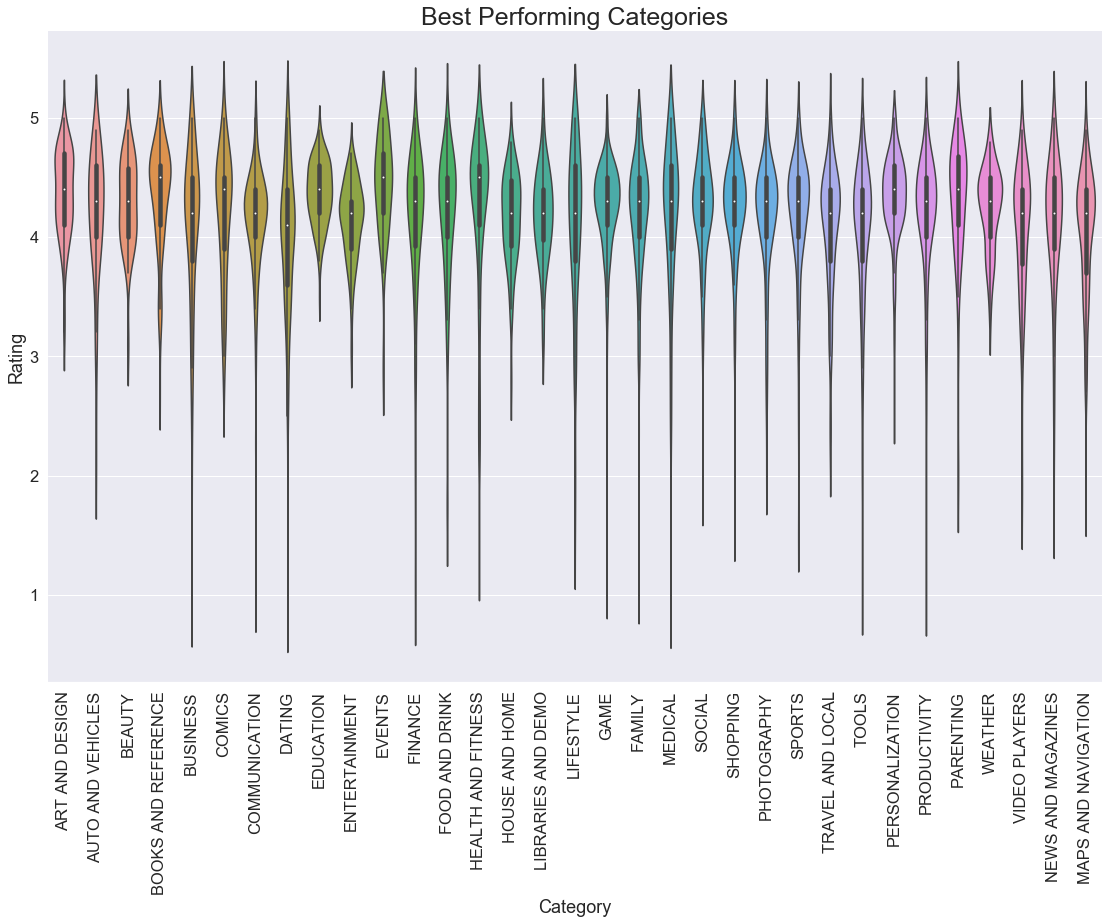

In [39]:
sns.set(font_scale=1.5)
fig3=sns.catplot(x='Category',y='Rating',data=df,kind='violin',height=10,aspect=17/10)
fig3.despine(left=True)
fig3.set_xticklabels(rotation=90)
plt.title('Best Performing Categories',size=25)
fig3.savefig('Best Performing Categories.jpg')
plt.show()


- Almost all app categories perform decently. **Health and Fitness, Events** and **Books and Reference** produce the highest quality apps with **50% apps having a rating greater than 4.5.** This is extremely high!


- On the contrary, **50% of apps in the Dating category have a rating lesser than the average rating**. 

## Bulky or Light? How do app sizes impact the app rating?

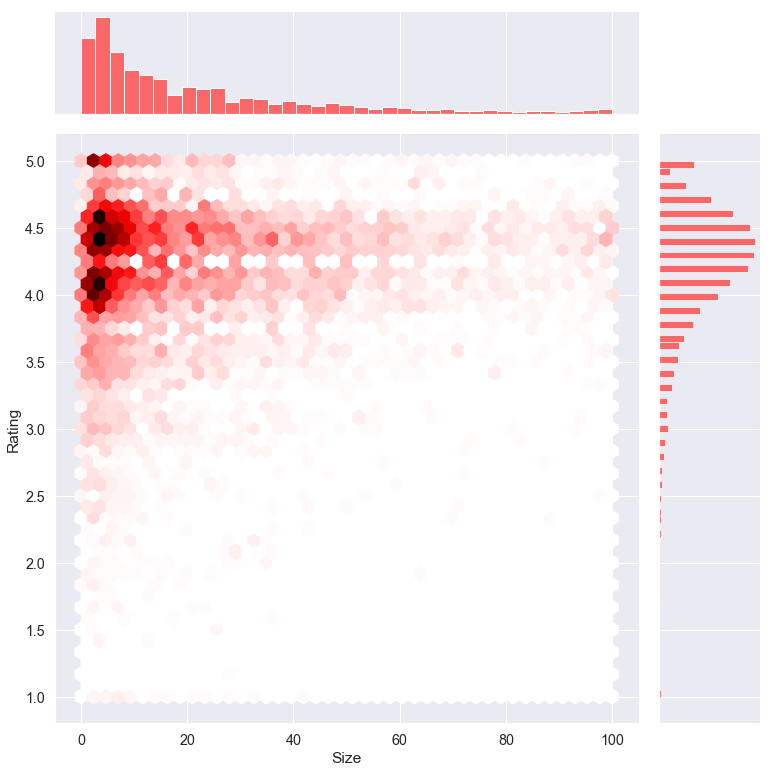

In [40]:
sns.set(font_scale=1.3)
fig4=sns.jointplot(x=df['Size'],y=df['Rating'],kind='hex',color='#ff3b3b',height=11)
fig4.savefig('Bulky or Light.jpg')

- Most top rated apps sized between **~2MB to ~40MB**.

## Free or Paid? How do app prices impact the app rating?

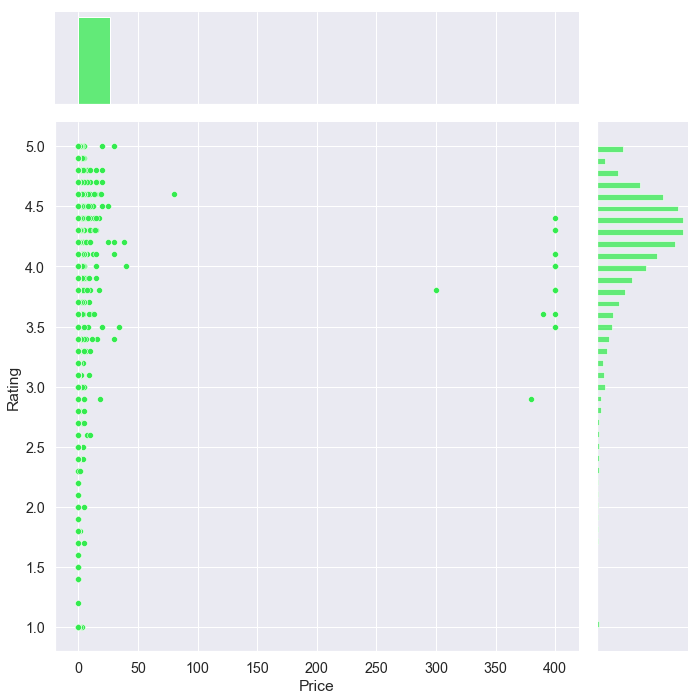

In [41]:
sns.set(font_scale=1.3)
fig5=sns.jointplot( df["Price"], df["Rating"],height=10,color='#34eb4f')
fig5.savefig('Free or Paid.jpg')

- Most top rated apps are optimally priced between **1 to 20 USD** There are only a very few apps priced above **20 USD.**


- shocking, some apps are priced around **400 USD.** That's pretty high.

### Current Pricing Trend accross Categories

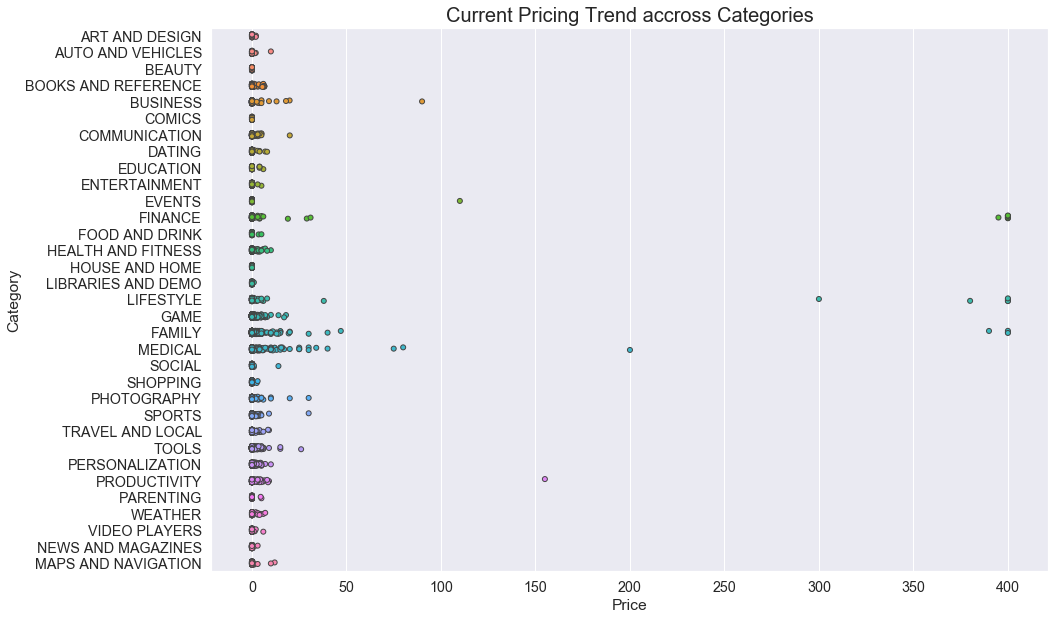

In [42]:
sns.set(font_scale=1.3)
fig6, ax = plt.subplots()
fig6.set_size_inches(15, 10)
fig6=sns.stripplot(x=df["Price"],y=df["Category"],jitter=True,linewidth=1)
plt.title('Current Pricing Trend accross Categories',size=20)
plt.savefig('Current Pricing Trend accross Categories.jpg')
plt.show()

- Let's remove the junk apps priced more than **100 USD**

### Filtering out apps priced more than 100 USD

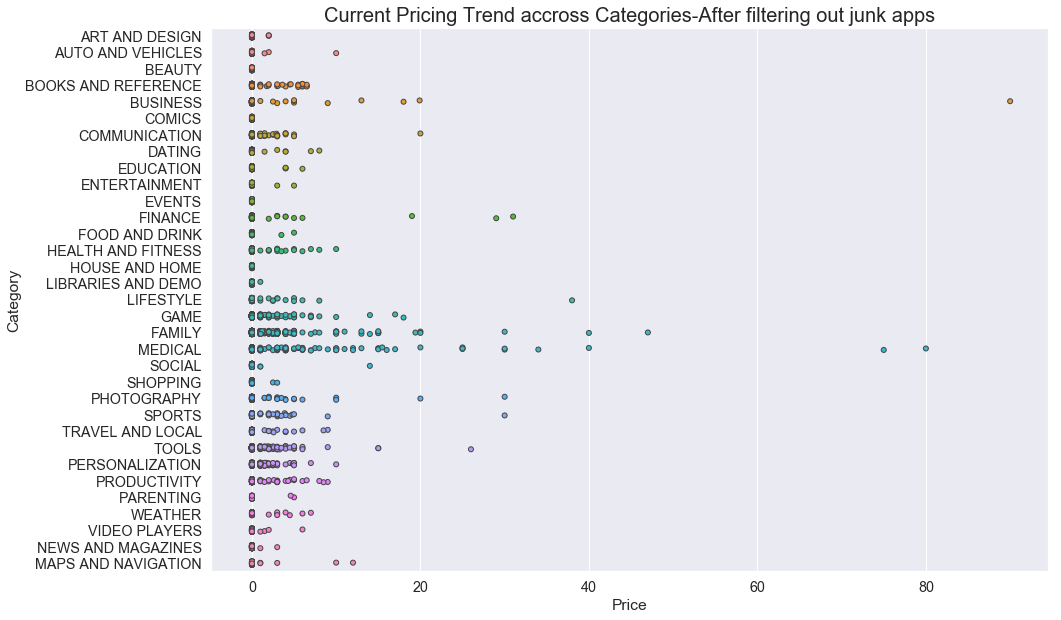

In [43]:
apps_price=df[df['Price']<100]
sns.set(font_scale=1.3)
fig7, ax = plt.subplots()
fig7.set_size_inches(15, 10)
fig7=sns.stripplot(x=apps_price["Price"],y=apps_price["Category"],jitter=True,linewidth=1)
plt.title('Current Pricing Trend accross Categories-After filtering out junk apps',size=20)
plt.savefig('Current Pricing Trend accross Categories-After filtering out junk apps.jpg')
plt.show()

- Clearly, **Medical and Family apps** are the most expensive. Some medical apps extend even upto 80 USD.


- All other apps are priced under 30.


- Surprisingly, **all game apps are reasonably priced below 20 USD.**

## Are paid apps downloaded as much as free apps?

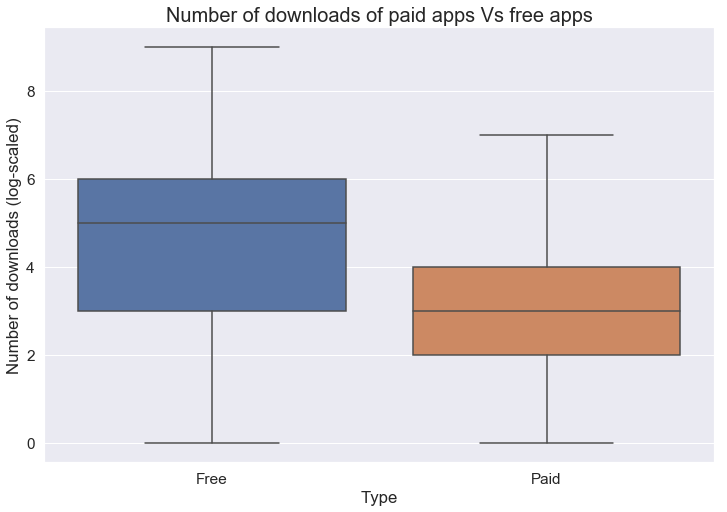

In [44]:
sns.set(font_scale=1.4)
fig8=sns.boxplot(x=df['Type'],y=np.log10(df['Installs']))
plt.title('Number of downloads of paid apps Vs free apps',size=20)
plt.ylabel('Number of downloads (log-scaled)')
plt.savefig('Number of downloads of paid apps Vs free apps.jpg')
plt.show()

- **Paid apps have a relatively lower number of downloads than free apps.** However, it is not too bad.

## How do the sizes of paid apps manipulate their rating ?

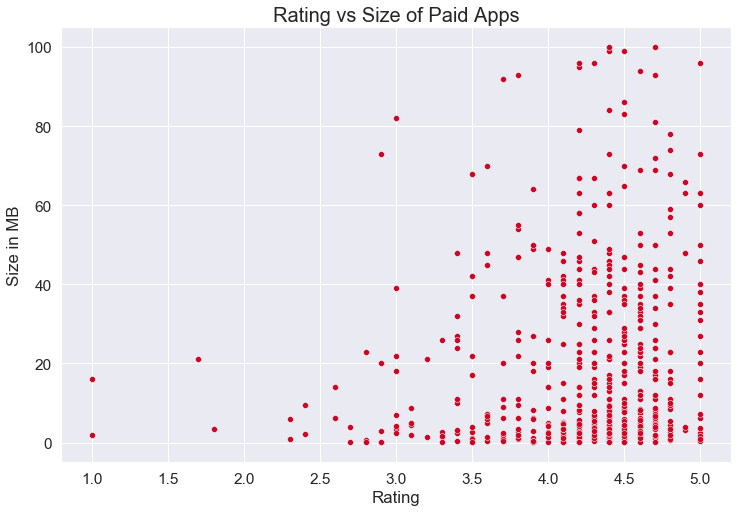

In [45]:
paid_apps=df[df['Type']=='Paid']
sns.set(font_scale=1.4)
fig9=sns.scatterplot(x=paid_apps['Rating'],y=paid_apps['Size'],color='#cc0624')
plt.ylabel('Size in MB')
plt.title('Rating vs Size of Paid Apps',size=20)
plt.savefig('Paid-Rating vs Size.jpg')
plt.show()

- **Majority of the paid apps that are highly rated have small sizes.** This means that most popular paid apps are designed and developed to cater to specific functionalities and hence are not bulky.


- **Users prefer to pay for apps that are light-weighted.** A paid app that is bulky may not perform well in the market.

## Basic sentiment anlysis using user reviews

In [46]:
merged_df=pd.merge(df,reviews_df,on='App',how='inner')
merged_df.dropna(subset=['Sentiment', 'Translated_Review'],inplace=True)
#merged_df

In [47]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y*100

In [48]:
data=[go.Bar(x=list(new_df.Category.unique()),y=new_df.Sentiment_Normalized[::3],name='Negative',marker_color='#cc0213'),
      go.Bar(x=list(new_df.Category.unique()),y=new_df.Sentiment_Normalized[1::3],name='Neutral',marker_color='#45a5ff'),
      go.Bar(x=list(new_df.Category.unique()),y=new_df.Sentiment_Normalized[2::3],name='Positive',marker_color='#00d11c')  
     ]
layout=go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -60},
    yaxis = {'title': 'Percentage of reviews'}
    )
fig10=go.Figure(data=data,layout=layout)
fig10.show()

- **Health and Fitness, Comic** apps perform the best, having more than **80% positive reviews**.


- Many **Game and Social** apps perform bad leading to **only 50% positive reviews**.

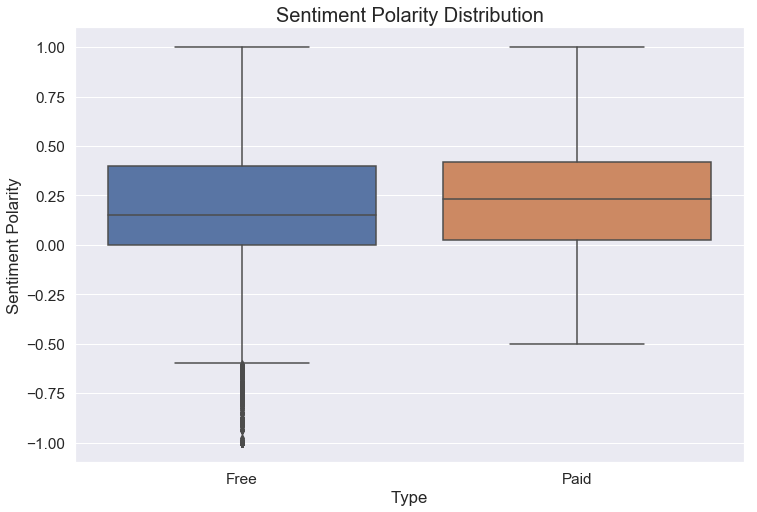

In [49]:
sns.set(font_scale=1.4)
fig11=sns.boxplot(x=merged_df['Type'],y=merged_df['Sentiment_Polarity'])
plt.title('Sentiment Polarity Distribution',size=20)
plt.ylabel('Sentiment Polarity')
plt.savefig('Sentiment Polarity Distribution.jpg')
plt.show()

- **Free apps receive a lot of harsh comments** which are indicated as outliers on the negative Y-axis. 


- **Users are more tolerant while reviewing paid apps.** They are never extremely negative while reviewing a paid app. 

# CONCLUSION

 - Average rating of (active) apps on Google Play Store is **4.17**.
 
 
 - **Users prefer to pay for apps that are light-weighted.** Thus, a paid app that is bulky may not perform well in the market.
 
 
 - Most of the top rated apps are **optimally sized between ~2MB to ~40MB** - neither too light nor too heavy.
 
 
 - Most of the top rated apps are **optimally priced between ~1 USD to ~30 USD** - neither too cheap nor too expensive.
 
 
 - **Medical and Family apps are the most expensive** and even extend upto 80 USD.
 
 
 - Users tend to download a given app more if it has been reviewed by a large number of people.
 
 
 - **Health and Fitness** apps receive more than **85% positive reviews**. **Game and Social** apps receive mixed feedback - **50% positive and 50% negative.**
 
 
 - **Users are more grim and harsh while reviewing free apps** than paid apps. 